In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('/home/ali/Documents/term6/deep-learning/complete-tensorflow-2-and-keras-deep-learning-bootcamp-2020/course/summary') as f:
    contents = f.readlines()

In [3]:
print(''.join(contents))

01-course-overview-installs-and-setup:
    01-course-overview.mp4                                                             : 00:04:38 C 2022/03/16
    02-course-setup-and-installation.mp4                                               : 00:21:49 C 2022/03/16
    total                                                                              : 00:26:27 +

02-numpy-crash-course:
    01-introduction-to-numpy.mp4                                                       : 00:02:24
    02-numpy-arrays.mp4                                                                : 00:18:55
    03-numpy-index-selection.mp4                                                       : 00:11:06
    04-numpy-operations.mp4                                                            : 00:08:14
    05-numpy-exercises.mp4                                                             : 00:01:18
    06-numpy-exercises-solutions.mp4                                                   : 00:07:05
    total                  

## Use the power of regex to extract information

In [4]:
import re

In [11]:
information = []
current_chapter = ''

for line in contents:
    stripped = line.strip()   
    chapter = re.search(r'^(\d{2}-[a-z0-9-]*):', stripped)
    if chapter:
        current_chapter = chapter.group(1)
        
    video = re.search(r'\d{2}-.*\.mp4', stripped)
    if video:
        contain_all_fields = re.search(r'(\S*)\s+:\s(\S*)\sC\s(\S*)', stripped)
        if contain_all_fields:
            information.append([current_chapter, contain_all_fields.group(1), contain_all_fields.group(2),
                                contain_all_fields.group(3)])
        else:
            another_fields = re.search(r'(\S*)\s+:\s(\S*)', stripped)
            information.append([current_chapter, another_fields.group(1), another_fields.group(2)])

In [13]:
information

[['01-course-overview-installs-and-setup',
  '01-course-overview.mp4',
  '00:04:38',
  '2022/03/16'],
 ['01-course-overview-installs-and-setup',
  '02-course-setup-and-installation.mp4',
  '00:21:49',
  '2022/03/16'],
 ['02-numpy-crash-course', '01-introduction-to-numpy.mp4', '00:02:24'],
 ['02-numpy-crash-course', '02-numpy-arrays.mp4', '00:18:55'],
 ['02-numpy-crash-course', '03-numpy-index-selection.mp4', '00:11:06'],
 ['02-numpy-crash-course', '04-numpy-operations.mp4', '00:08:14'],
 ['02-numpy-crash-course', '05-numpy-exercises.mp4', '00:01:18'],
 ['02-numpy-crash-course', '06-numpy-exercises-solutions.mp4', '00:07:05'],
 ['03-pandas-crash-course', '01-introduction-to-pandas.mp4', '00:03:57'],
 ['03-pandas-crash-course', '02-pandas-series.mp4', '00:08:40'],
 ['03-pandas-crash-course', '03-pandas-dataframes-part-one.mp4', '00:11:14'],
 ['03-pandas-crash-course', '04-pandas-dataframes-part-two.mp4', '00:09:32'],
 ['03-pandas-crash-course', '05-pandas-missing-data.mp4', '00:10:07'],


In [14]:
df = pd.DataFrame(columns=['chapter', 'video', 'length', 'date'])

In [15]:
for field in information:
    if len(field) == 3:
        row = field
        row.append(np.nan)
        df.loc[len(df.index)] = row
    else:
        df.loc[len(df.index)] = field

In [18]:
df

,chapter,video,length,date
0,01-course-overview-installs-and-setup,01-course-overview.mp4,00:04:38,2022/03/16
1,01-course-overview-installs-and-setup,02-course-setup-and-installation.mp4,00:21:49,2022/03/16
2,02-numpy-crash-course,01-introduction-to-numpy.mp4,00:02:24,NaN
3,02-numpy-crash-course,02-numpy-arrays.mp4,00:18:55,NaN
4,02-numpy-crash-course,03-numpy-index-selection.mp4,00:11:06,NaN
...,...,...,...,...
109,12-deployment,04-running-a-basic-flask-application.mp4,00:10:38,NaN
110,12-deployment,05-flask-postman-api.mp4,00:11:14,NaN
111,12-deployment,06-flask-api-using-requests-programmatically.mp4,00:03:53,NaN
112,12-deployment,07-flask-front-end.mp4,00:19:42,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   chapter  114 non-null    object
 1   video    114 non-null    object
 2   length   114 non-null    object
 3   date     20 non-null     object
dtypes: object(4)
memory usage: 4.5+ KB


## Get the readed chapters:

In [20]:
df[df['date'].notnull()]

,chapter,video,length,date
0,01-course-overview-installs-and-setup,01-course-overview.mp4,00:04:38,2022/03/16
1,01-course-overview-installs-and-setup,02-course-setup-and-installation.mp4,00:21:49,2022/03/16
29,06-basic-artificial-neural-networks-anns,01-introduction-to-ann-section.mp4,00:02:15,2022/03/17
30,06-basic-artificial-neural-networks-anns,02-perceptron-model.mp4,00:10:39,2022/03/17
31,06-basic-artificial-neural-networks-anns,03-neural-networks.mp4,00:07:19,2022/03/17
32,06-basic-artificial-neural-networks-anns,04-activation-functions.mp4,00:10:39,2022/03/17
33,06-basic-artificial-neural-networks-anns,05-multi-class-classification-considerations.mp4,00:10:34,2022/03/17
34,06-basic-artificial-neural-networks-anns,06-cost-functions-and-gradient-descent.mp4,00:18:13,2022/03/17
35,06-basic-artificial-neural-networks-anns,07-backpropagation.mp4,00:14:47,2022/03/17
36,06-basic-artificial-neural-networks-anns,08-tensorflow-vs-keras-explained.mp4,00:02:13,2022/03/17


In [21]:
df['date'] = pd.to_datetime(df['date'])
df['length'] = pd.to_timedelta(df['length'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   chapter  114 non-null    object         
 1   video    114 non-null    object         
 2   length   114 non-null    timedelta64[ns]
 3   date     20 non-null     datetime64[ns] 
dtypes: datetime64[ns](1), object(2), timedelta64[ns](1)
memory usage: 4.5+ KB


In [23]:
df[df['date'].notnull()].groupby('chapter')['length'].sum()

chapter
01-course-overview-installs-and-setup      0 days 00:26:27
06-basic-artificial-neural-networks-anns   0 days 03:13:08
Name: length, dtype: timedelta64[ns]

In [24]:
df[df['date'].notnull()].groupby('chapter')['length'].sum().sum()

Timedelta('0 days 03:39:35')

Show each day total time:

In [25]:
pd.DataFrame(df.groupby('date')['length'].sum())

,length
date,
2022-03-16,0 days 00:26:27
2022-03-17,0 days 03:13:08


In [26]:
each_day = pd.DataFrame(df.groupby('date')['length'].sum()).reset_index()

In [27]:
each_day

,date,length
0,2022-03-16,0 days 00:26:27
1,2022-03-17,0 days 03:13:08


In [28]:
each_day['length']

0   0 days 00:26:27
1   0 days 03:13:08
Name: length, dtype: timedelta64[ns]

https://stackoverflow.com/questions/48294332/plot-datetime-timedelta-using-matplotlib-and-python

In [29]:
each_day['length'].dt.total_seconds()

0     1587.0
1    11588.0
Name: length, dtype: float64

In [30]:
from matplotlib.ticker import FuncFormatter

def format_func(x, pos):
    hours = int(x//3600)
    minutes = int((x%3600)//60)
    
    return "{:d}:{:02d}".format(hours, minutes)

formatter = FuncFormatter(format_func)

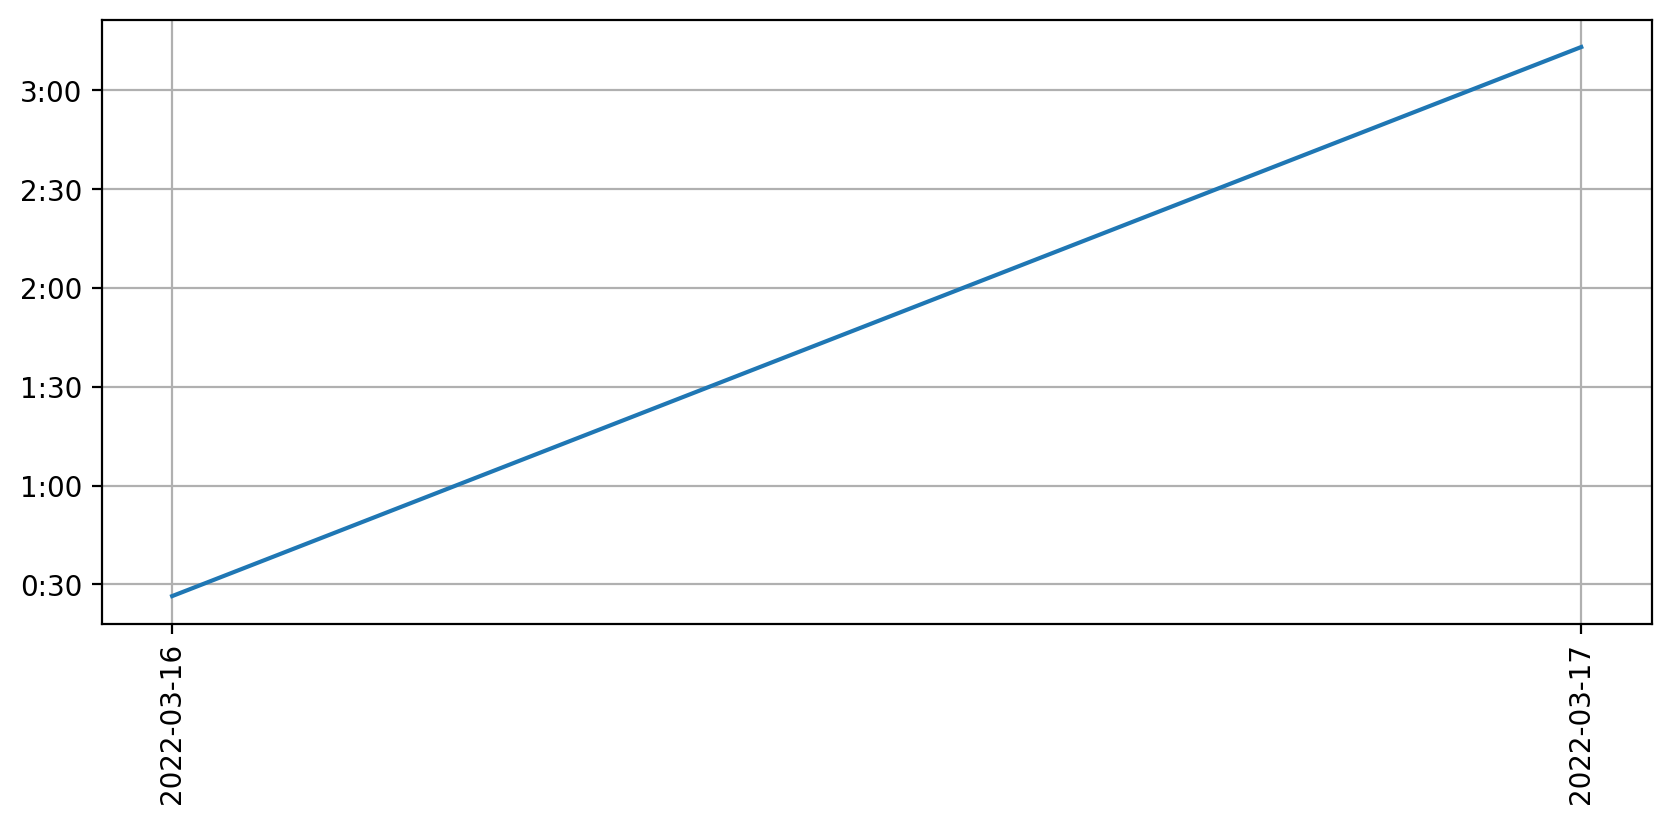

In [31]:
import matplotlib as mpl

f = plt.figure(figsize=(10, 4), dpi=200)
ax = f.add_subplot(1,1,1)
ax.plot(each_day['date'], each_day['length'].dt.total_seconds())
plt.xticks(rotation=90);

ax.yaxis.set_major_formatter(formatter)
# this locates y-ticks at the hours
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=3600 / 2))
# this ensures each bar has a 'date' label
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=1))

plt.grid()

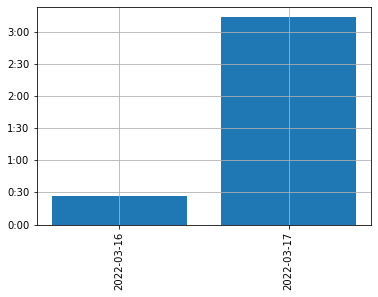

In [36]:
import matplotlib as mpl

# f = plt.figure(figsize=(10, 4), dpi=200)
f = plt.figure()
ax = f.add_subplot(1,1,1)
ax.bar(each_day['date'], each_day['length'].dt.total_seconds())
plt.xticks(rotation=90);

ax.yaxis.set_major_formatter(formatter)
# this locates y-ticks at the hours
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=3600 / 2))
# this ensures each bar has a 'date' label
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=1))

plt.grid()